# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_excel("Selenium_df_Movie_Master_500.xlsx")

In [3]:
df.shape

(500, 20)

In [4]:
df.head()

,Production Budget,Domestic Gross,Worldwide Gross,Release Date,Movie,Opening,Legs,Domestic Share,Theater counts,Infl. Adj. Dom. BO,Running Time,Genre,Method,Type,Artist_Group_1,Artist_Group_1_Count,Artist_Group_2,Artist_Group_2_Count,Artist_Group_3,Artist_Group_3_Count
0,400000000,858373000,2797800564,"Apr 23, 2019",Avengers: Endgame,357115007.0,2.40,30.7,4662.0,8.583730e+08,181.0,Action,Animation/Live Action,Super Hero,"Robert Downey, Jr.",32,Katherine Langford,25.0,Stan Lee,5.0
1,379000000,241063875,1045663875,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,90151958.0,2.67,23.1,4155.0,2.769347e+08,136.0,Adventure,Live Action,Fantasy,Johnny Depp,4,Kevin McNally,46.0,Rob Marshall,56.0
2,365000000,459005868,1403013963,"Apr 22, 2015",Avengers: Age of Ultron,191271109.0,2.40,32.7,4276.0,4.960312e+08,141.0,Action,Animation/Live Action,Super Hero,James Spader,1,"Robert Downey, Jr.",9.0,Don Cheadle,44.0
3,306000000,936662225,2068223624,"Dec 16, 2015",Star Wars Ep. VII: The Force Awakens,247966675.0,3.78,45.3,4134.0,1.006873e+09,136.0,Adventure,Animation/Live Action,Science Fiction,Adam Driver,3,Harrison Ford,36.0,J.J. Abrams,58.0
4,300000000,678815482,2048359754,"Apr 25, 2018",Avengers: Infinity War,257698183.0,2.63,33.1,4474.0,6.788155e+08,156.0,Action,Animation/Live Action,Super Hero,"Robert Downey, Jr.",23,Anthony Mackie,21.0,Samuel L. Jackson,4.0


## Data Preparation

In [5]:
# dropping the features not required in the model
df=df.drop(['Release Date', 'Movie'],axis=1)

In [6]:
df.shape

(500, 18)

In [7]:
# Renaming the features for clear interpretability
df.rename(columns = {'Type':'Creative Type'}, inplace = True) 
df.rename(columns = {'Method':'Production Method'}, inplace = True)
df.rename(columns = {'Artist_Group_1':'Lead Actor'}, inplace = True) 
df.rename(columns = {'Artist_Group_1_Count':'No of Lead Actors'}, inplace = True) 
df.rename(columns = {'Artist_Group_2':'Cast'}, inplace = True) 
df.rename(columns = {'Artist_Group_2_Count':'No of support  cast'}, inplace = True) 
df.rename(columns = {'Artist_Group_3':'Support Actors'}, inplace = True)
df.rename(columns = {'Artist_Group_3_Count':'No of support  Actors'}, inplace = True) 

In [8]:
df.head()

,Production Budget,Domestic Gross,Worldwide Gross,Opening,Legs,Domestic Share,Theater counts,Infl. Adj. Dom. BO,Running Time,Genre,Production Method,Creative Type,Lead Actor,No of Lead Actors,Cast,No of support cast,Support Actors,No of support Actors
0,400000000,858373000,2797800564,357115007.0,2.40,30.7,4662.0,8.583730e+08,181.0,Action,Animation/Live Action,Super Hero,"Robert Downey, Jr.",32,Katherine Langford,25.0,Stan Lee,5.0
1,379000000,241063875,1045663875,90151958.0,2.67,23.1,4155.0,2.769347e+08,136.0,Adventure,Live Action,Fantasy,Johnny Depp,4,Kevin McNally,46.0,Rob Marshall,56.0
2,365000000,459005868,1403013963,191271109.0,2.40,32.7,4276.0,4.960312e+08,141.0,Action,Animation/Live Action,Super Hero,James Spader,1,"Robert Downey, Jr.",9.0,Don Cheadle,44.0
3,306000000,936662225,2068223624,247966675.0,3.78,45.3,4134.0,1.006873e+09,136.0,Adventure,Animation/Live Action,Science Fiction,Adam Driver,3,Harrison Ford,36.0,J.J. Abrams,58.0
4,300000000,678815482,2048359754,257698183.0,2.63,33.1,4474.0,6.788155e+08,156.0,Action,Animation/Live Action,Super Hero,"Robert Downey, Jr.",23,Anthony Mackie,21.0,Samuel L. Jackson,4.0


# check missing values

In [9]:
df.isnull().sum()

Production Budget         0
Domestic Gross            0
Worldwide Gross           0
Opening                   9
Legs                      8
Domestic Share            8
Theater counts            9
Infl. Adj. Dom. BO        7
Running Time             16
Genre                     2
Production Method         1
Creative Type             2
Lead Actor                0
No of Lead Actors         0
Cast                      3
No of support  cast       3
Support Actors           20
No of support  Actors    20
dtype: int64

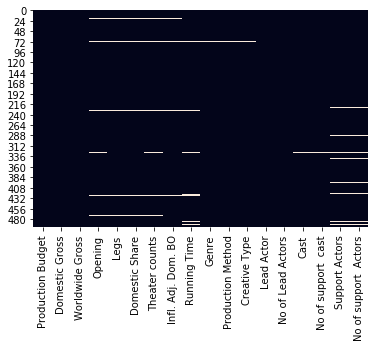

In [10]:
sns.heatmap(df.isnull(), cbar = False)
plt.show()

#### 1)We see that there are missing values in features such as Opening ,Legs, Domestic Share, Theater counts, Infl. Adj. Dom. BO,Running Time, Genre, Production Method, Creative Type, Cast, No of support cast, No of support cast and No of support Actors. 
#### 2)As the total rows with missing values were less we decided to drop the missing values 

In [11]:
df=df.dropna() # since total missing values are less than 1% of data we can drop all NaN values

In [12]:
df.isnull().sum()

Production Budget        0
Domestic Gross           0
Worldwide Gross          0
Opening                  0
Legs                     0
Domestic Share           0
Theater counts           0
Infl. Adj. Dom. BO       0
Running Time             0
Genre                    0
Production Method        0
Creative Type            0
Lead Actor               0
No of Lead Actors        0
Cast                     0
No of support  cast      0
Support Actors           0
No of support  Actors    0
dtype: int64

In [13]:
df.shape

(464, 18)

## Correlation Analysis

In [14]:
corr = df.corr()
corr

,Production Budget,Domestic Gross,Worldwide Gross,Opening,Legs,Domestic Share,Theater counts,Infl. Adj. Dom. BO,Running Time,No of Lead Actors,No of support cast,No of support Actors
Production Budget,1.000000,0.515693,0.575001,0.593472,-0.147666,-0.169279,0.428024,0.414264,0.258589,0.189436,0.037449,-0.021620
Domestic Gross,0.515693,1.000000,0.929643,0.877150,0.190208,0.094316,0.373020,0.950300,0.281153,0.208442,-0.022029,-0.117549
Worldwide Gross,0.575001,0.929643,1.000000,0.815388,0.193547,-0.179219,0.387046,0.868733,0.325211,0.238503,0.007526,-0.061044
Opening,0.593472,0.877150,0.815388,1.000000,-0.206258,0.057596,0.543700,0.767327,0.250824,0.276550,0.034691,-0.123138
Legs,-0.147666,0.190208,0.193547,-0.206258,1.000000,0.072524,-0.340361,0.326273,0.124836,-0.086798,-0.144124,-0.067246
Domestic Share,-0.169279,0.094316,-0.179219,0.057596,0.072524,1.000000,-0.087179,0.144964,-0.117939,-0.059270,-0.092702,-0.164077
Theater counts,0.428024,0.373020,0.387046,0.543700,-0.340361,-0.087179,1.000000,0.256566,-0.046863,0.126130,0.047271,-0.046380
Infl. Adj. Dom. BO,0.414264,0.950300,0.868733,0.767327,0.326273,0.144964,0.256566,1.000000,0.312139,0.117848,-0.041650,-0.133660
Running Time,0.258589,0.281153,0.325211,0.250824,0.124836,-0.117939,-0.046863,0.312139,1.000000,0.029620,0.187813,0.087772
No of Lead Actors,0.189436,0.208442,0.238503,0.276550,-0.086798,-0.059270,0.126130,0.117848,0.029620,1.000000,-0.064862,-0.059796


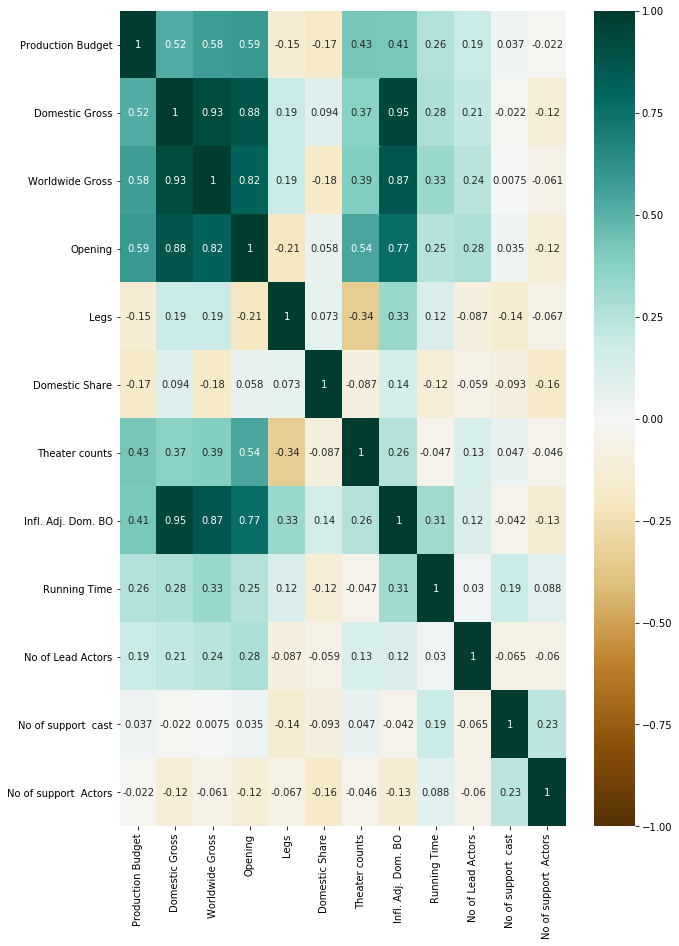

In [15]:
plt.figure(figsize=(10,15))
c= df.corr()
sns.heatmap(c,cmap="BrBG",vmin=-1,vmax=1,annot=True)
plt.show()

### We clearly see 
#### 1.	Strong positive correlation  of  our target variable Worldwide gross with Opening,Domestic gross &.infl.Adj Dom BO
#### 2.	Moderate positive correlation of  our target variable Worldwide gross withProduction Budget
#### 3.	There maybe problems of multi-collinarity as features like Opening,Domestic gross &.infl.Adj Dom BO have Strong  positive correlation amongest themselves

# Checking Distribution

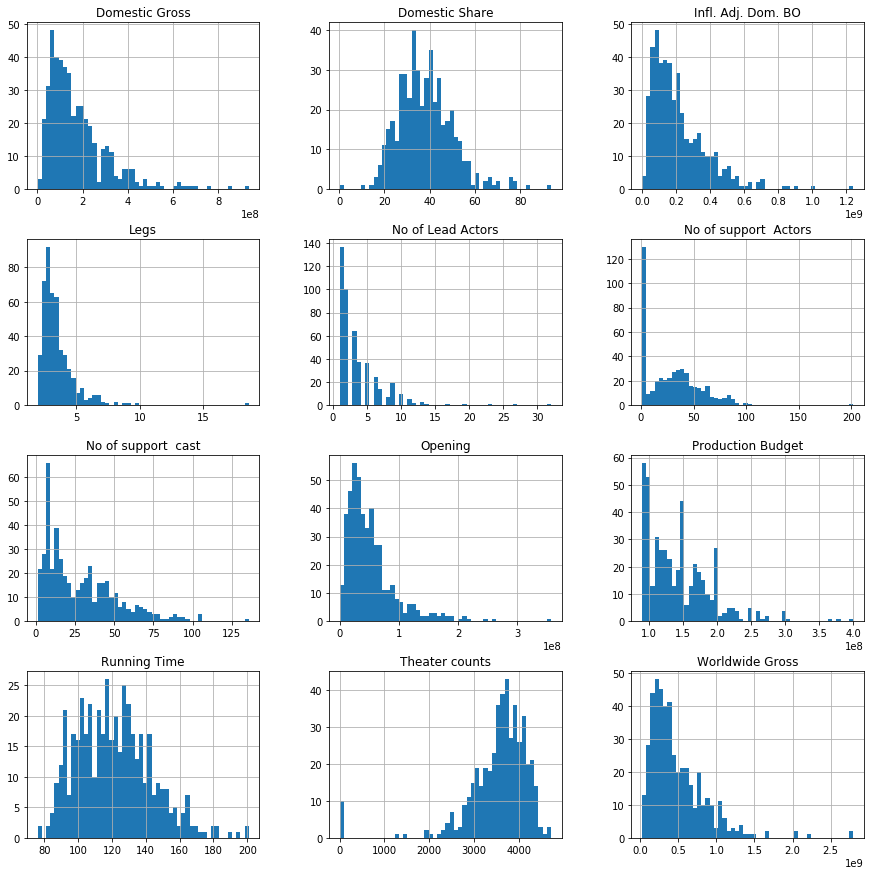

In [16]:
df.hist(bins=50,figsize=(15,15))
plt.show()

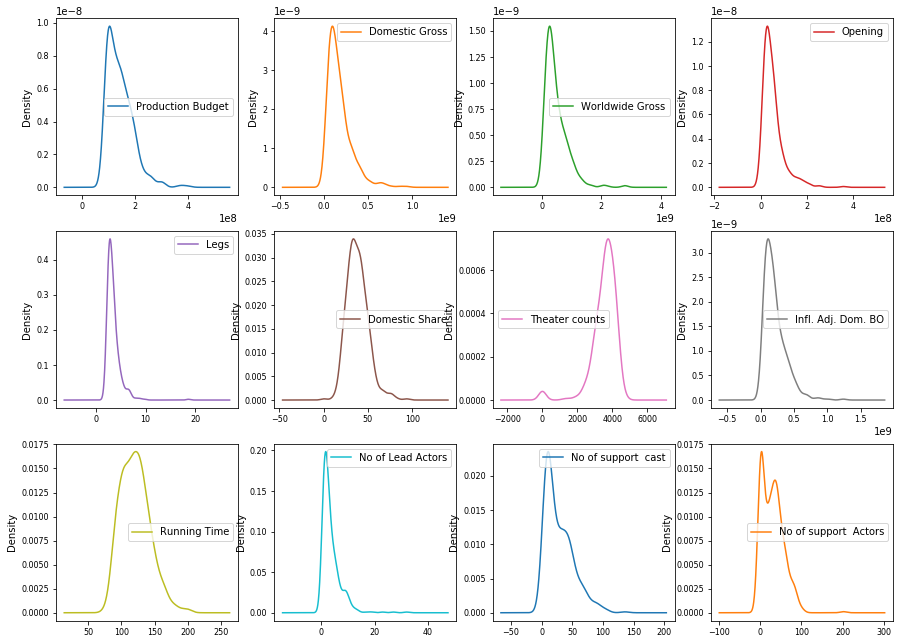

In [17]:
df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, sharey=False,fontsize=8, figsize = (15, 15))
plt.show()

### We can observe 
#### 1.	Positive skewness from the histogram plot for Our target variable worldwide gross
#### 2.	Theater counts is negatively skewed. 
#### 3.	Running time is approximately normal skewed
#### 4.	We may have to apply Transformation to the data 

# Checking ouliers

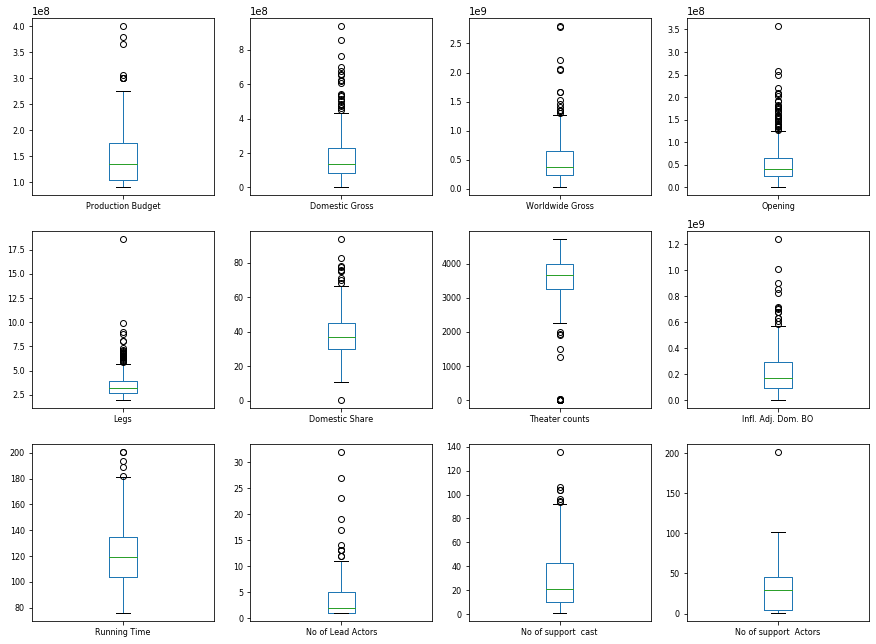

In [18]:
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,fontsize=8, figsize = (15, 15))
plt.show()

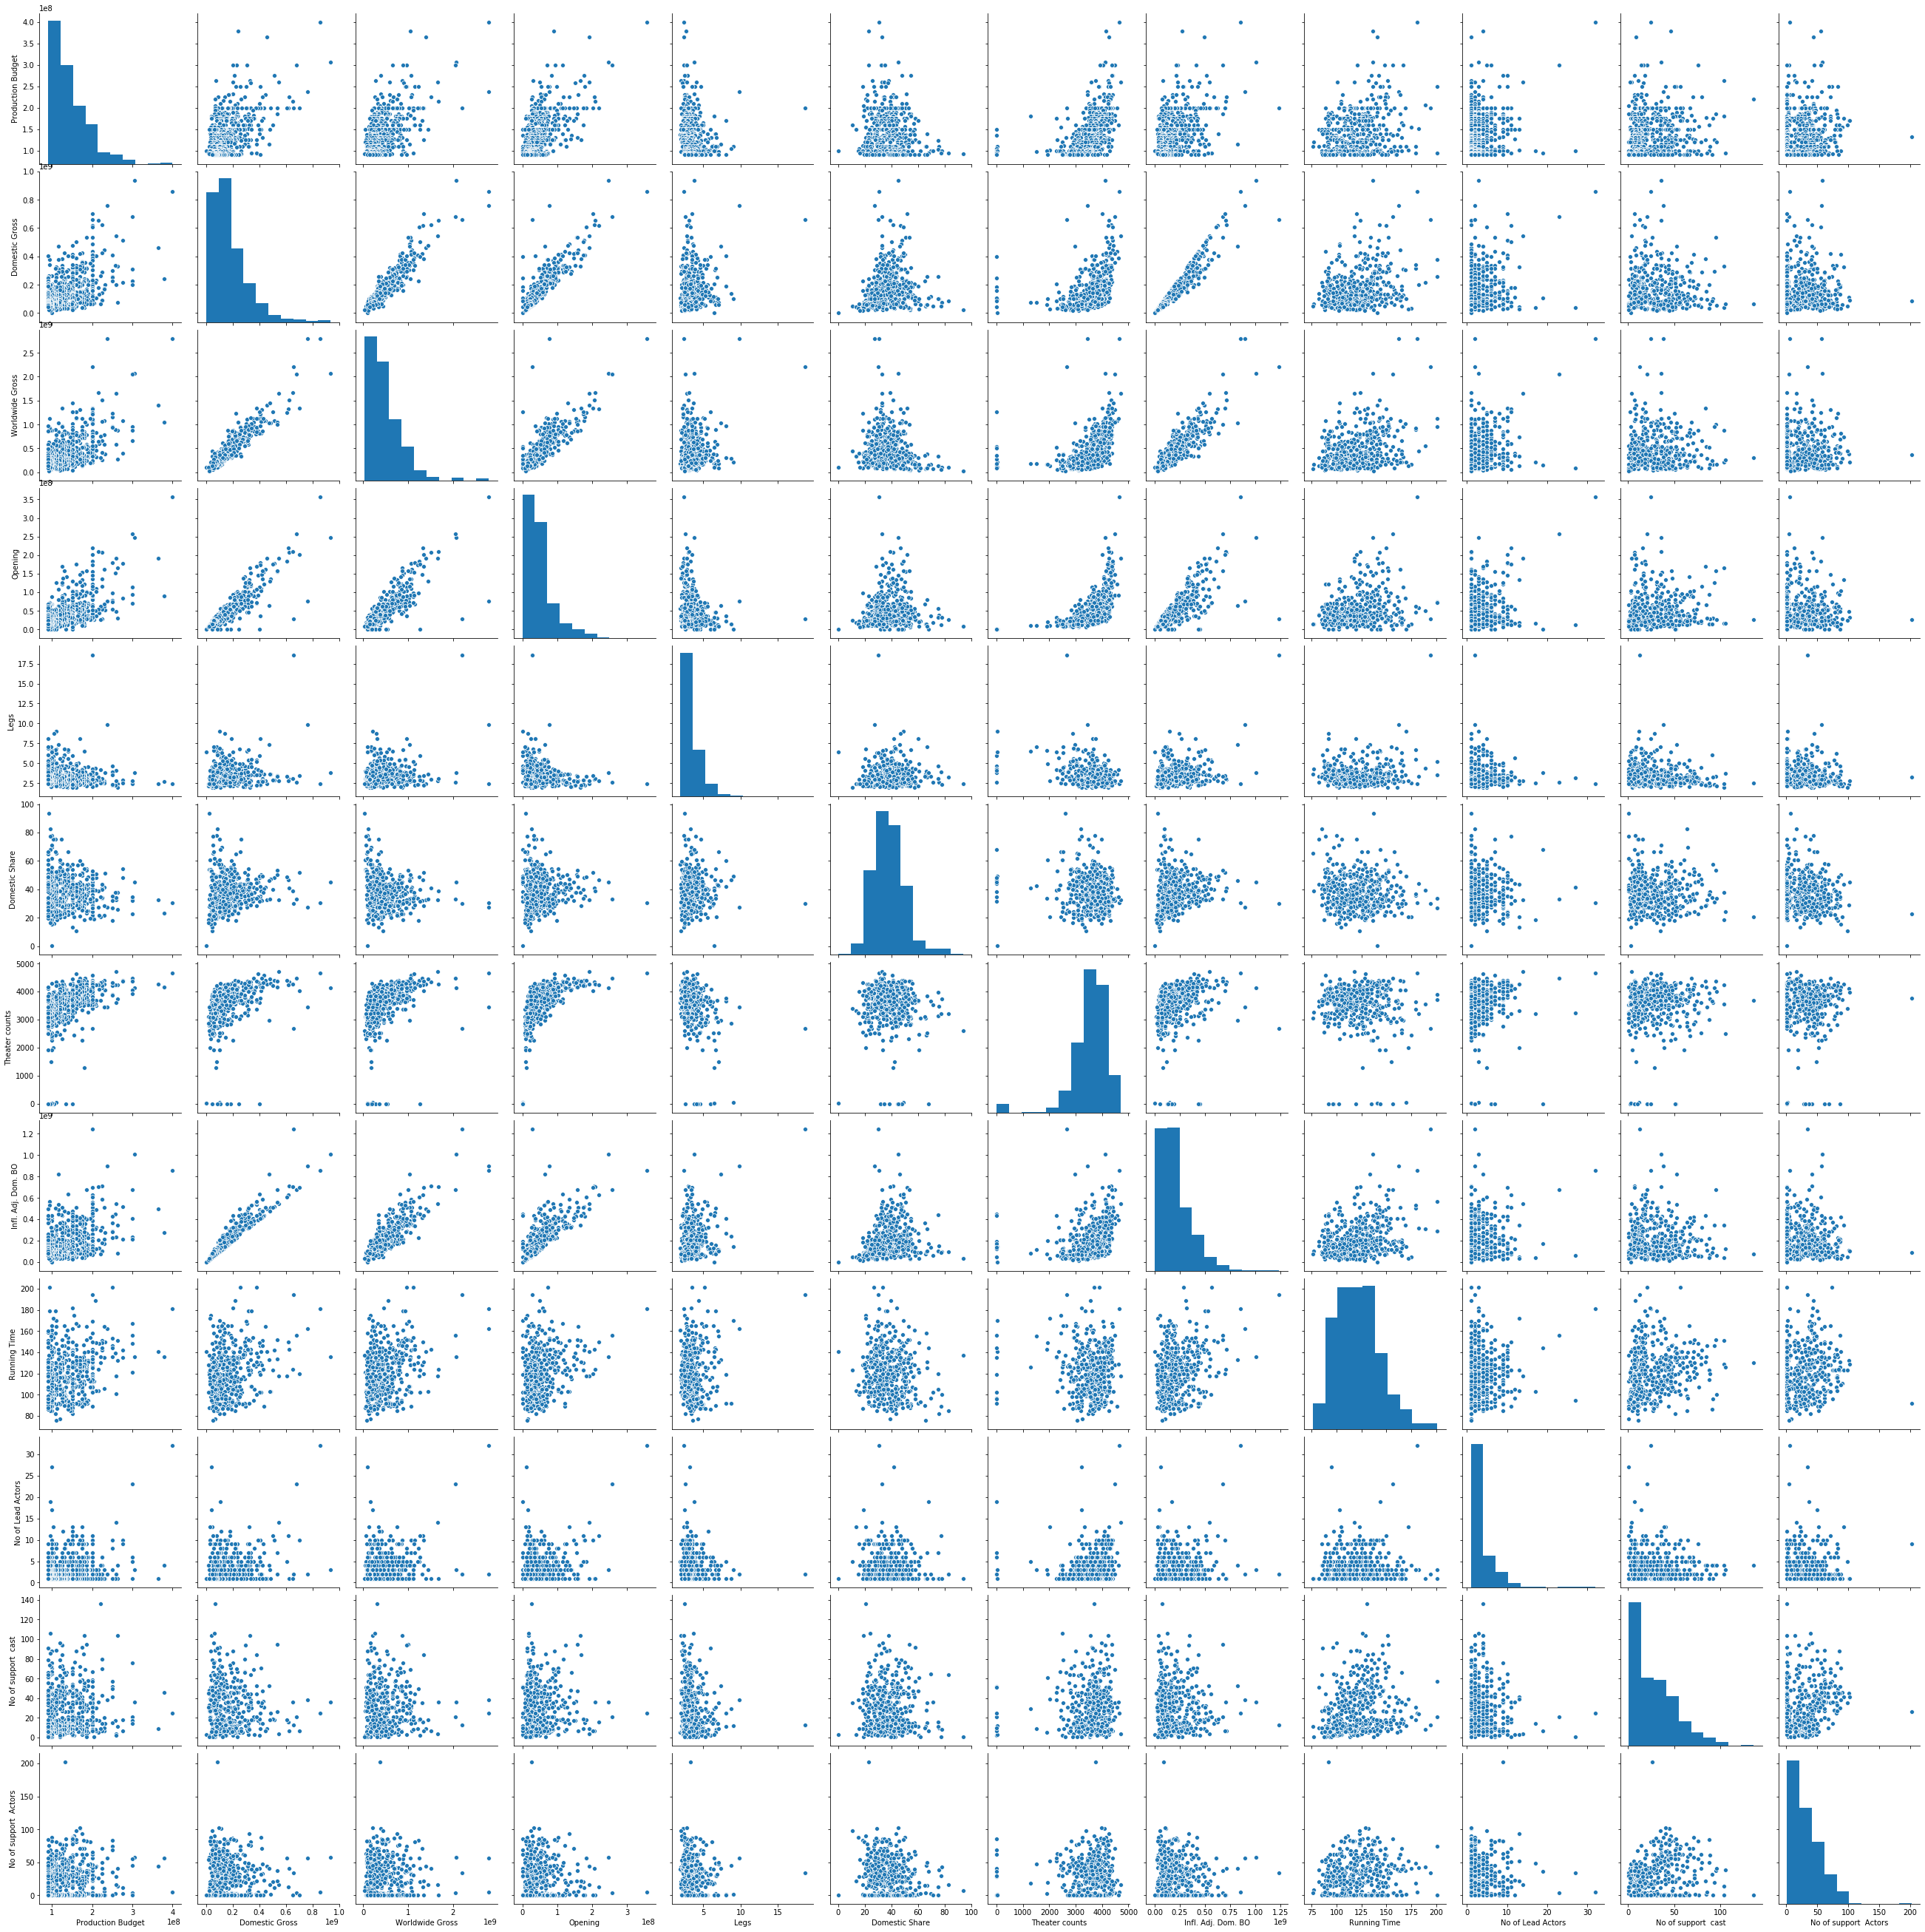

In [19]:
sns.pairplot(df,height=3) # scatter matrix
plt.show()

#### We see outlier in all features. They are data-points that are extreme to normal observations. Many machine learning models, like linear & logistic regression, are easily impacted by the outliers in the training data. Instead of linear models, we can use tree-based methods which are less impacted by outliers. Tree based methods are robust to outliers.

Text(0, 0.5, 'Opening')

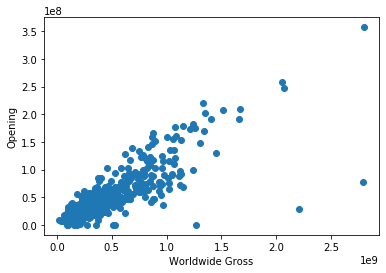

In [20]:
plt.scatter(df["Worldwide Gross"],df["Opening"])
plt.xlabel("Worldwide Gross")
plt.ylabel("Opening")

Text(0, 0.5, 'Domestic Gross')

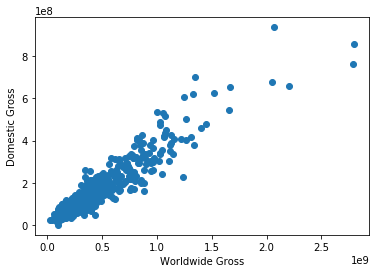

In [21]:
plt.scatter(df["Worldwide Gross"],df["Domestic Gross"])
plt.xlabel("Worldwide Gross")
plt.ylabel("Domestic Gross")

### We see that Opening Value greater than 300000000,Domestic Gross greater than 800000000 are extreme values with respective to target

#  Analyzing Catagorical Values

In [22]:
df["Genre"].unique()

array(['Action', 'Adventure', 'Musical', 'Western', 'Thriller/Suspense',
       'Drama', 'Comedy', 'Horror', 'Black Comedy', 'Romantic Comedy'],
      dtype=object)

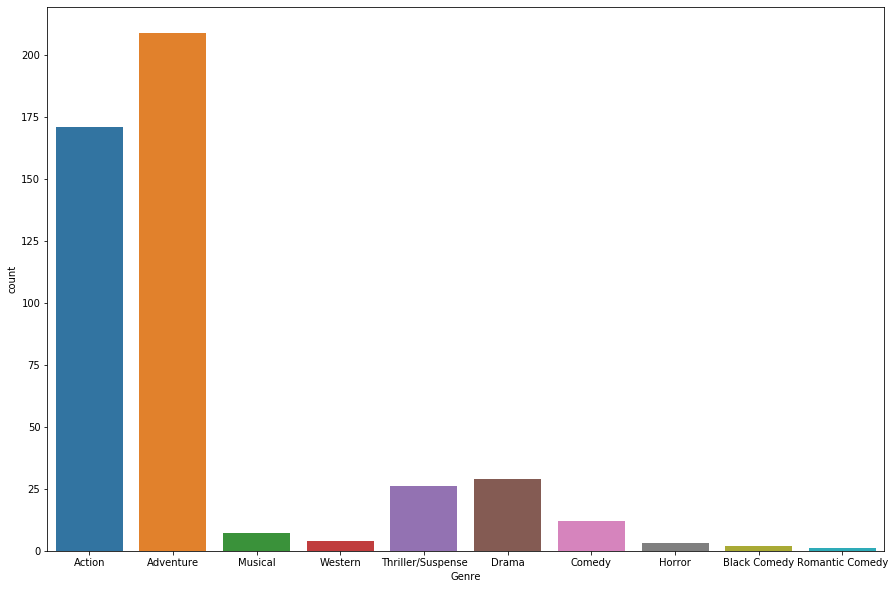

In [23]:
plt.figure(figsize=(15,10))
sns.countplot(x = df["Genre"])
plt.show()

### we see that
#### 1) there are 10 unique genre
#### 2) Most of the movies ( more than 50% of data) have genre as Action(more than 160) or Adventure(more than 200)

In [24]:
df["Production Method"].unique()

array(['Animation/Live Action', 'Live Action', 'Digital Animation',
       'Hand Animation'], dtype=object)

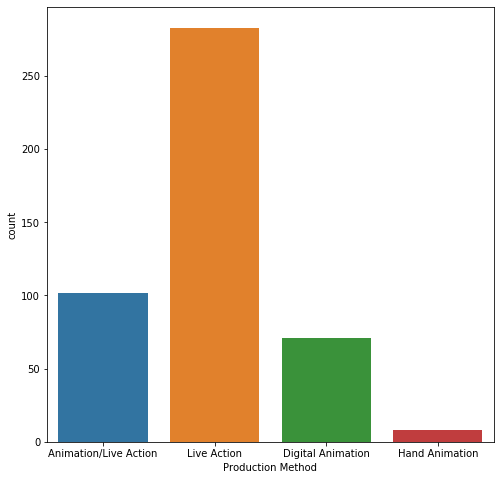

In [25]:
plt.figure(figsize=(8,8))
sns.countplot(x = df["Production Method"])
plt.show()

### we see that
#### 1) there are 4 unique Production Methods
#### 2) Most of the movies ( approx 300 more than 50% of data) have production method  as Live  Action

In [26]:
df["Creative Type"].unique()

array(['Super Hero', 'Fantasy', 'Science Fiction', 'Historical Fiction',
       'Contemporary Fiction', 'Kids Fiction', 'Dramatization',
       'Multiple Creative Types'], dtype=object)

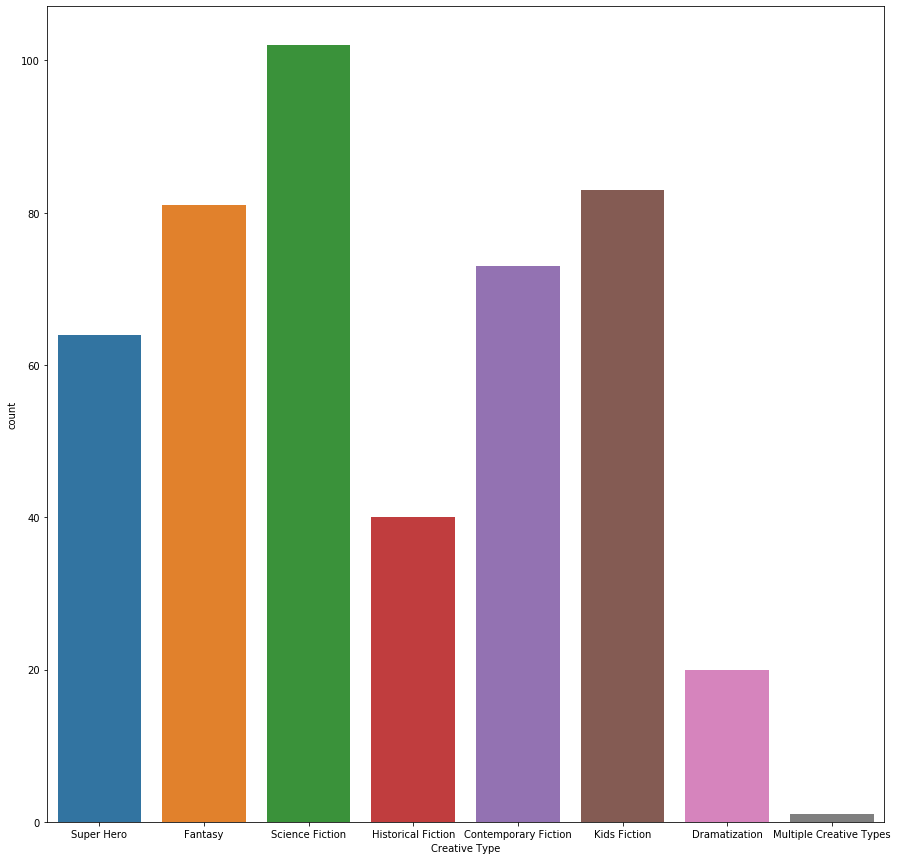

In [27]:
plt.figure(figsize=(15,15))
sns.countplot(x = df["Creative Type"])
plt.show()

### we see that
#### 1) there are 8 unique Creative types
#### 2) Creative Type Science Fiction has the highest movies

In [28]:
df["Lead Actor"].value_counts()

Johnny Depp          15
Tom Cruise           12
Will Smith           11
Leonardo DiCaprio    10
Hugh Jackman          9
                     ..
Billy Crystal         1
Travis Fimmel         1
Jason Momoa           1
Bill Hader            1
Dane DeHaan           1
Name: Lead Actor, Length: 231, dtype: int64

In [29]:
df["Cast"].value_counts()

Ian McKellen       5
Halle Berry        4
John Turturro      4
Joan Cusack        3
Jeremy Irons       3
                  ..
Terry Notary       1
Cliff Curtis       1
Greg Kinnear       1
Jesse Eisenberg    1
Julia Stiles       1
Name: Cast, Length: 379, dtype: int64

In [30]:
df["Support Actors"].value_counts()

Stan Lee            25
Ridley Scott         8
Peter Jackson        7
David Yates          6
Michael Bay          5
                    ..
Michel Gondry        1
Justin Kurzel        1
Cliff Curtis         1
Barry Sonnenfeld     1
Sig Hansen           1
Name: Support Actors, Length: 304, dtype: int64

## Encoding making target variable ready

In [31]:
df1=pd.get_dummies(df,drop_first=True)

In [32]:
df1.tail()

,Production Budget,Domestic Gross,Worldwide Gross,Opening,Legs,Domestic Share,Theater counts,Infl. Adj. Dom. BO,Running Time,No of Lead Actors,...,Support Actors_Walt Becker,Support Actors_Walt Dohrn,Support Actors_Walter F. Parkes,Support Actors_Wendy Crewson,Support Actors_Will Finn,Support Actors_Wolf Blitzer,Support Actors_Wolfgang Petersen,Support Actors_Zack Snyder,Support Actors_Zareh Nalbandian,Support Actors_Zhang Yimou
492,90000000,62362560,143049560,21689125.0,2.88,43.6,2770.0,100337294.0,127.0,2,...,0,0,0,0,0,0,0,0,0,0
495,90000000,58250803,273477501,23633317.0,2.46,21.3,3854.0,58250807.0,118.0,1,...,0,0,0,0,0,0,0,0,0,0
496,90000000,58220776,87420776,8234926.0,7.03,66.6,2518.0,102488283.0,131.0,1,...,0,0,0,0,0,0,0,0,0,0
497,90000000,51877963,203653524,15193907.0,3.41,25.5,3086.0,76104384.0,126.0,3,...,0,0,0,0,0,0,0,0,0,0
499,90000000,42885593,140900000,14274503.0,3.00,30.4,2504.0,85117153.0,107.0,2,...,0,0,0,0,0,0,0,0,0,0


In [33]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
robust_scaled_df = scaler.fit_transform(df1)
robust_scaled_df = pd.DataFrame(robust_scaled_df, columns=df1.columns)
robust_scaled_df

,Production Budget,Domestic Gross,Worldwide Gross,Opening,Legs,Domestic Share,Theater counts,Infl. Adj. Dom. BO,Running Time,No of Lead Actors,...,Support Actors_Walt Becker,Support Actors_Walt Dohrn,Support Actors_Walter F. Parkes,Support Actors_Wendy Crewson,Support Actors_Will Finn,Support Actors_Wolf Blitzer,Support Actors_Wolfgang Petersen,Support Actors_Zack Snyder,Support Actors_Zareh Nalbandian,Support Actors_Zhang Yimou
0,3.723217,4.989623,5.829458,7.621675,-0.623701,-0.413333,1.354883,3.541786,2.000000,7.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.428170,0.722524,1.620126,1.192287,-0.399168,-0.920000,0.664852,0.544108,0.548387,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.231472,2.229030,2.478624,3.627584,-0.623701,-0.280000,0.829534,1.673688,0.709677,-0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.402529,5.530791,4.076723,4.993008,0.523909,0.560000,0.636271,4.307396,0.548387,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.318230,3.748446,4.029002,5.227376,-0.432432,-0.253333,1.099013,2.616055,1.193548,5.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,-0.632244,-0.512735,-0.548314,-0.456534,-0.224532,0.446667,-1.220143,-0.366362,0.258065,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
460,-0.632244,-0.541157,-0.234974,-0.409711,-0.573805,-1.040000,0.255189,-0.583344,-0.032258,-0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
461,-0.632244,-0.541364,-0.681957,-0.780557,3.226611,1.980000,-1.563117,-0.355272,0.387097,-0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
462,-0.632244,-0.585209,-0.402719,-0.612961,0.216216,-0.760000,-0.790065,-0.491297,0.225806,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Split the data in Train set & test Set

In [34]:
X=robust_scaled_df.drop(["Worldwide Gross"],axis=1)
y=robust_scaled_df["Worldwide Gross"]
from sklearn.model_selection import train_test_split 
seed = 10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = seed)

# Decision Tree Regression

#### Using GridSearchCV with 10 fold Cross-Validation to get best parameters to build our model

In [35]:
# Applying GridSearch-cross validation to get best model paramaters
from sklearn.tree import DecisionTreeRegressor  
from sklearn.model_selection import GridSearchCV
param_grid = {"criterion": ["mse", "mae"],
              "max_depth": [8,15,20,50],
              "max_leaf_nodes": [40,50,60],
              "min_samples_leaf": [10,15,20],
              "min_samples_split": [10,15,20],
              }
Regressor = GridSearchCV(DecisionTreeRegressor(),param_grid, cv=10,n_jobs=-1)
Regressor.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [8, 15, 20, 50],
                         'max_leaf_nodes': [40,

In [36]:
Regressor.best_params_

{'criterion': 'mse',
 'max_depth': 8,
 'max_leaf_nodes': 40,
 'min_samples_leaf': 10,
 'min_samples_split': 10}

In [37]:
DT_model=Regressor.best_estimator_
DT_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features=None, max_leaf_nodes=40,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [38]:
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)
from sklearn.metrics import r2_score, mean_squared_error
#print(LR_model1.score(X_train, y_train))
print ("R-squared Training",r2_score(y_train, y_train_pred))
print ("R-squared Testing",r2_score(y_test, y_test_pred))
print ("Train RMSE : ",np.sqrt(mean_squared_error(y_train, y_train_pred)))
print ("Test RMSE : ",np.sqrt(mean_squared_error(y_test, y_test_pred)))

R-squared Training 0.9302446271893947
R-squared Testing 0.8669691658507667
Train RMSE :  0.24360166514571155
Test RMSE :  0.2703303192917947


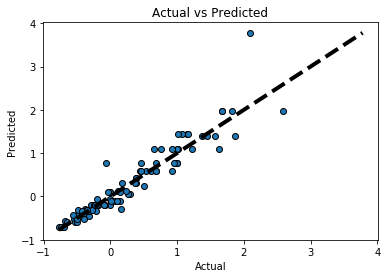

In [39]:
# So let's run the model against the test data
fig, ax = plt.subplots()
ax.scatter(y_test, y_test_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test_pred.max()], [y_test.min(), y_test_pred.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

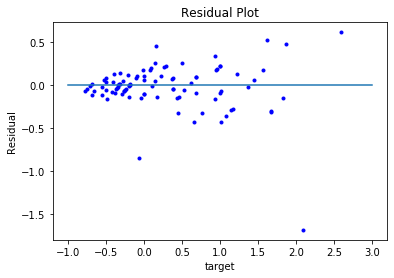

In [41]:
res = y_test - y_test_pred
plt.plot(y_test,res,'b.')
plt.plot([-1,3],[0,0])
plt.xlabel("target")
plt.ylabel("Residual")
plt.title("Residual Plot")
plt.show()

# Bagged Decision Trees

In [42]:
#bin target variable for better sampling
bins = 50*np.arange(8)
binned_y = np.digitize(y, bins)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=binned_y)

In [43]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [44]:
single_estimator = DecisionTreeRegressor()
ensemble_estimator = BaggingRegressor(base_estimator = single_estimator)

In [45]:
param_grid = param_grid = {'oob_score' : [True, False],'n_estimators':[100,150],'base_estimator__max_depth':[3,5],
                           "base_estimator__min_samples_leaf": [2,5],"base_estimator__min_samples_split":[2,4],}
random_bag = GridSearchCV(ensemble_estimator,param_grid, cv=10,n_jobs=-1)
random_bag.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                                             criterion='mse',
                                                                             max_depth=None,
                                                                             max_features=None,
                                                                             max_leaf_nodes=None,
                                                                             min_impurity_decrease=0.0,
                                                                             min_impurity_split=None,
                                                                             min_samples_leaf=1,
                                                                             min_samples_split=2,
                                                                             min_weight_f

In [46]:
random_bag.best_params_

{'base_estimator__max_depth': 5,
 'base_estimator__min_samples_leaf': 2,
 'base_estimator__min_samples_split': 2,
 'n_estimators': 100,
 'oob_score': False}

In [47]:
DTbagging_model_1 = random_bag.best_estimator_
DTbagging_model_1.fit(X_train, y_train) 

BaggingRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                      criterion='mse',
                                                      max_depth=5,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=2,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort='deprecated',
                                                      random_state=None,
                                                      splitter='best'),
                 bootstrap=True

In [48]:
y_train_pred = DTbagging_model_1.predict(X_train)
y_test_pred = DTbagging_model_1.predict(X_test)
from sklearn.metrics import r2_score, mean_squared_error
print ("R-squared Training",r2_score(y_train, y_train_pred))
print ("R-squared Testing",r2_score(y_test, y_test_pred))
print ("Train RMSE : ",np.sqrt(mean_squared_error(y_train, y_train_pred)))
print ("Test RMSE  : ",np.sqrt(mean_squared_error(y_test, y_test_pred)))

R-squared Training 0.9787728702702734
R-squared Testing 0.8969153315535359
Train RMSE :  0.13031269170309118
Test RMSE  :  0.2773450568410115


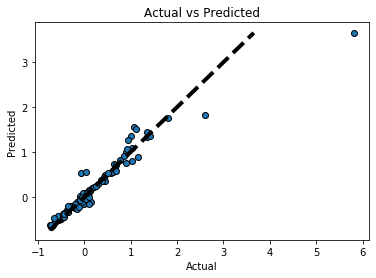

In [49]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_test_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test_pred.max()], [y_test.min(), y_test_pred.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

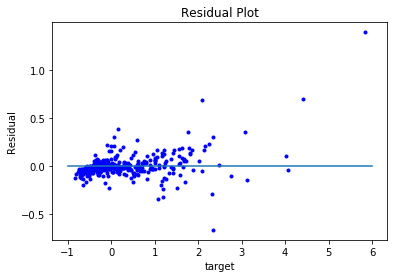

In [50]:
res = y_train - y_train_pred
plt.plot(y_train,res,'b.')
plt.plot([-1,6],[0,0])
plt.xlabel("target")
plt.ylabel("Residual")
plt.title("Residual Plot")
plt.show()

# Bagging KNeighborsRegressor

In [51]:
#bin target variable for better sampling
bins = 50*np.arange(8)
binned_y = np.digitize(y, bins)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=binned_y)

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=binned_y)

In [53]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [54]:
single_estimator = KNeighborsRegressor()
ensemble_estimator = BaggingRegressor(base_estimator = single_estimator)

In [55]:
param_grid = {'oob_score' : [True, False],
              'n_estimators': [100,150],
              'base_estimator__n_neighbors':[3,7,9]
              }
random_bag = GridSearchCV(ensemble_estimator,param_grid, cv=10,n_jobs=-1)
random_bag.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=BaggingRegressor(base_estimator=KNeighborsRegressor(algorithm='auto',
                                                                           leaf_size=30,
                                                                           metric='minkowski',
                                                                           metric_params=None,
                                                                           n_jobs=None,
                                                                           n_neighbors=5,
                                                                           p=2,
                                                                           weights='uniform'),
                                        bootstrap=True,
                                        bootstrap_features=False,
                                        max_features=1.0, max_samples=1.0,
                                        n

In [56]:
random_bag.best_params_

{'base_estimator__n_neighbors': 3, 'n_estimators': 100, 'oob_score': True}

In [57]:
bagging_model_1 = random_bag.best_estimator_
bagging_model_1.fit(X_train, y_train) 

BaggingRegressor(base_estimator=KNeighborsRegressor(algorithm='auto',
                                                    leaf_size=30,
                                                    metric='minkowski',
                                                    metric_params=None,
                                                    n_jobs=None, n_neighbors=3,
                                                    p=2, weights='uniform'),
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_samples=1.0, n_estimators=100, n_jobs=None, oob_score=True,
                 random_state=None, verbose=0, warm_start=False)

In [58]:
y_train_pred = bagging_model_1.predict(X_train)
y_pred = bagging_model_1.predict(X_test)
from sklearn.metrics import r2_score, mean_squared_error
print ("R-squared Training",r2_score(y_train, y_train_pred))
print ("R-squared Testing",r2_score(y_test, y_pred))
print ("Train RMSE : ",np.sqrt(mean_squared_error(y_train, y_train_pred)))
print ("Test RMSE  : ",np.sqrt(mean_squared_error(y_test, y_pred)))

R-squared Training 0.8934484465053435
R-squared Testing 0.9191741553625536
Train RMSE :  0.2925482234245477
Test RMSE  :  0.24438243644430485


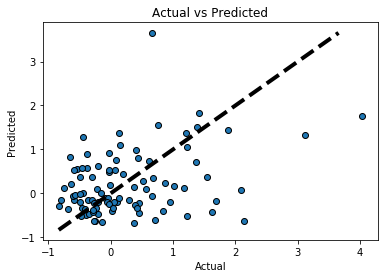

In [59]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_test_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test_pred.max()], [y_test.min(), y_test_pred.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

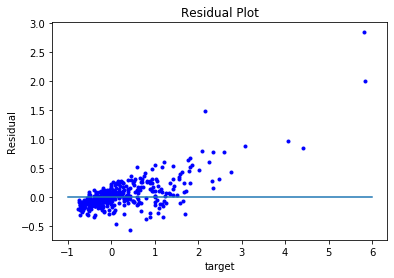

In [60]:
res = y_train - y_train_pred
plt.plot(y_train,res,'b.')
plt.plot([-1,6],[0,0])
plt.xlabel("target")
plt.ylabel("Residual")
plt.title("Residual Plot")
plt.show()

# Gradient Boosting regression

In [162]:
bins = 50*np.arange(10)
binned_y = np.digitize(y,bins,right=False)

In [163]:
from sklearn.model_selection import train_test_split
seed=10
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=seed,stratify=binned_y)

In [170]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
param_grid =  {
              'max_depth':[3,5],
              'min_samples_split':[21,25],
              'min_samples_leaf':[21,25],
              'n_estimators':[100],
              'learning_rate':[0.1,0.3,1],
               'loss':['ls','huber']
              }
Boosted_Regressor = GridSearchCV(GradientBoostingRegressor(warm_start=True),
                                  param_grid,cv=10,n_jobs=-1)
Boosted_Regressor.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_...
                            

In [171]:
Boosted_Regressor.best_params_

{'learning_rate': 0.3,
 'loss': 'ls',
 'max_depth': 5,
 'min_samples_leaf': 20,
 'min_samples_split': 20,
 'n_estimators': 100}

In [172]:
GradientBoosting_model_1=Boosted_Regressor.best_estimator_.fit(X_train,y_train)

In [173]:
y_train_pred = GradientBoosting_model_1.predict(X_train)
y_test_pred = GradientBoosting_model_1.predict(X_test)
from sklearn.metrics import r2_score, mean_squared_error
print ("R-squared Training",r2_score(y_train, y_train_pred))
print ("R-squared Testing",r2_score(y_test, y_test_pred))
print ("Train RMSE : ",np.sqrt(mean_squared_error(y_train, y_train_pred)))
print ("Test RMSE  : ",np.sqrt(mean_squared_error(y_test, y_test_pred)))

R-squared Training 0.9869946628894435
R-squared Testing 0.7909807839775675
Train RMSE :  0.09398934538225612
Test RMSE  :  0.5041632425880893


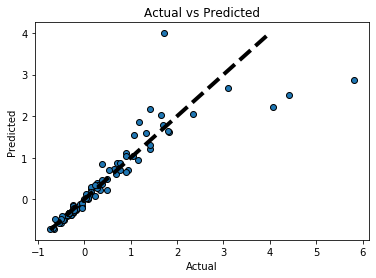

In [174]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_test_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test_pred.max()], [y_test.min(), y_test_pred.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

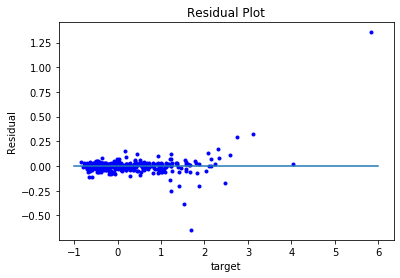

In [175]:
res = y_train - y_train_pred
plt.plot(y_train,res,'b.')
plt.plot([-1,6],[0,0])
plt.xlabel("target")
plt.ylabel("Residual")
plt.title("Residual Plot")
plt.show()

# Ridge regresion

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [71]:
Ridge()
params =  {'alpha':[0.001,0.05,0.1,0.5,1,10,100],"normalize":[True,False]}
model = GridSearchCV(Ridge(),param_grid=params,n_jobs=-1)
model.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.001, 0.05, 0.1, 0.5, 1, 10, 100],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [72]:
model.best_estimator_

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [73]:
Ridgr_model_1=model.best_estimator_.fit(X_train,y_train)
y_train_pred = Ridgr_model_1.predict(X_train)
y_pred = Ridgr_model_1.predict(X_test)
from sklearn.metrics import r2_score, mean_squared_error
print ("R-squared Training",r2_score(y_train, y_train_pred))
print ("R-squared Testing",r2_score(y_test, y_pred))
print ("Train RMSE : ",np.sqrt(mean_squared_error(y_train, y_train_pred)))
print ("Test RMSE  : ",np.sqrt(mean_squared_error(y_test, y_pred)))

R-squared Training 0.9953768115531488
R-squared Testing 0.9060857095259643
Train RMSE :  0.05603877278369532
Test RMSE  :  0.3379433560765449


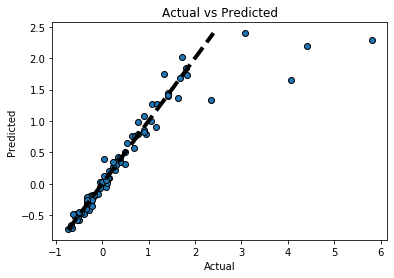

In [74]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_test_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test_pred.max()], [y_test.min(), y_test_pred.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

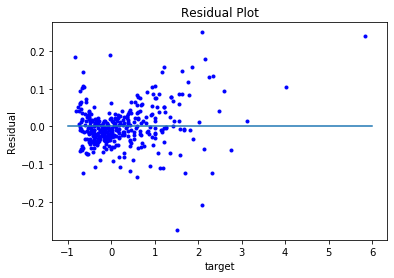

In [76]:
res = y_train - y_train_pred
plt.plot(y_train,res,'b.')
plt.plot([-1,6],[0,0])
plt.xlabel("target")
plt.ylabel("Residual")
plt.title("Residual Plot")
plt.show()

### Lasso

In [77]:
from sklearn.linear_model import Lasso

In [128]:
params =  {'alpha':[0.001,0.01,1]}
lasso_grid = GridSearchCV(Lasso(),param_grid=params,n_jobs=-1)
lasso_grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 1]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [129]:
lasso_grid.best_estimator_

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [130]:
Lasso_model_1=lasso_grid.best_estimator_.fit(X_train,y_train)

In [131]:
y_train_pred = Lasso_model_1.predict(X_train)
y_pred = Lasso_model_1.predict(X_test)
from sklearn.metrics import r2_score, mean_squared_error
print ("R-squared Training",r2_score(y_train, y_train_pred))
print ("R-squared Testing",r2_score(y_test, y_pred))
print ("Train RMSE : ",np.sqrt(mean_squared_error(y_train, y_train_pred)))
print ("Test RMSE  : ",np.sqrt(mean_squared_error(y_test, y_pred)))

R-squared Training 0.9717715324580677
R-squared Testing 0.9151423009822115
Train RMSE :  0.1384718418186543
Test RMSE  :  0.3212356213043569


In [132]:
coeff_used = np.sum(Lasso_model_1.coef_!=0)
print("number of features used: ", coeff_used)

number of features used:  65


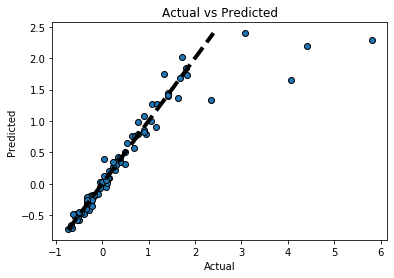

In [133]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_test_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test_pred.max()], [y_test.min(), y_test_pred.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

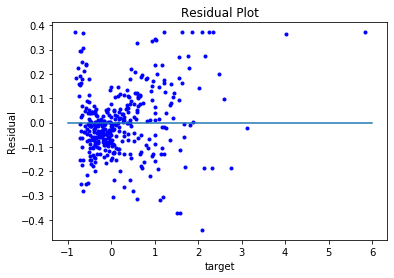

In [138]:
res = y_train - y_train_pred
plt.plot(y_train,res,'b.')
plt.plot([-1,6],[0,0])
plt.xlabel("target")
plt.ylabel("Residual")
plt.title("Residual Plot")
plt.show()

## Multiple Linear Regression

### A variance inflation factor(VIF) to detect multicollinearity

In [139]:
#Using user defined function to calculate VIF Score
import statsmodels.formula.api as smf
def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0, xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=smf.ols(formula='y~x', data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print( " VIF score for", xvar_names[i], "is:" , vif)
vif_cal(df.select_dtypes(np.number),'Worldwide Gross')

 VIF score for Production Budget is: 1.75
 VIF score for Domestic Gross is: 27.94
 VIF score for Opening is: 13.57
 VIF score for Legs is: 3.07
 VIF score for Domestic Share is: 1.16
 VIF score for Theater counts is: 1.7
 VIF score for Infl. Adj. Dom. BO is: 15.51
 VIF score for Running Time is: 1.32
 VIF score for No of Lead Actors is: 1.16
 VIF score for No of support  cast is: 1.13
 VIF score for No of support  Actors is: 1.13


#### we see that Vif score for  Domestic Gross,Opening,Infl. Adj. Dom. BO  is higher than 10 and hence they are highly correlated.Multi-collinearity may be a problem
#### VIFs for dummy variables representing nominal variables with three or more categories, usually not a problem.So we do not calculate VIfs for catagorical values

In [140]:
df_vf=df.drop(["Domestic Gross","Opening"],axis=1)

In [141]:
#Using user defined function to calculate VIF Score
import statsmodels.formula.api as smf
def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0, xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=smf.ols(formula='y~x', data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print( " VIF score for", xvar_names[i], "is:" , vif)
vif_cal(df_vf.select_dtypes(np.number),'Worldwide Gross')

 VIF score for Production Budget is: 1.6
 VIF score for Legs is: 1.53
 VIF score for Domestic Share is: 1.15
 VIF score for Theater counts is: 1.53
 VIF score for Infl. Adj. Dom. BO is: 1.85
 VIF score for Running Time is: 1.28
 VIF score for No of Lead Actors is: 1.06
 VIF score for No of support  cast is: 1.13
 VIF score for No of support  Actors is: 1.1


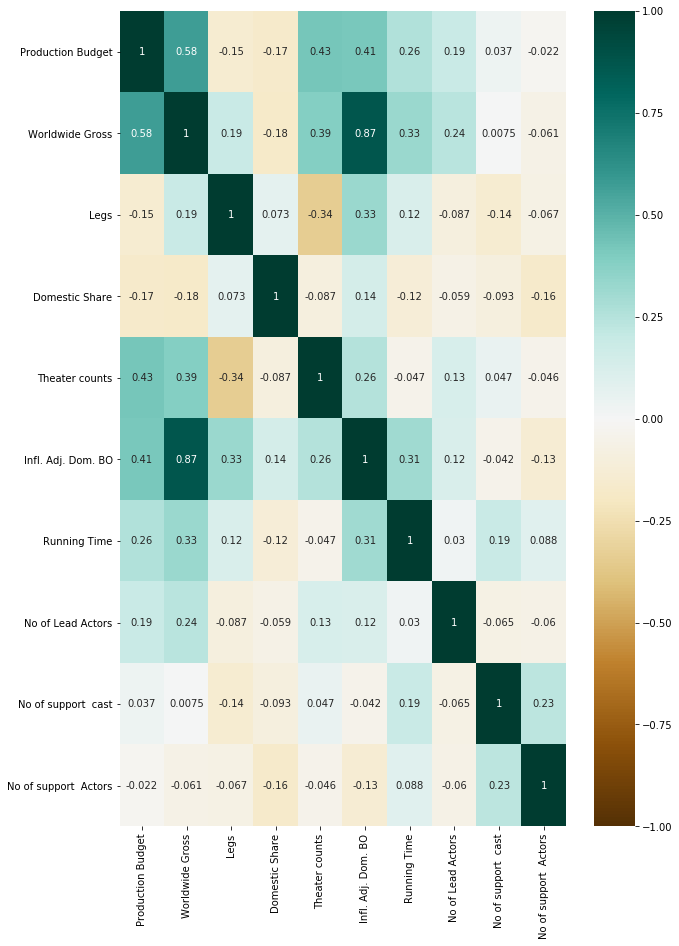

In [142]:
plt.figure(figsize=(10,15))
c= df_vf.corr()
sns.heatmap(c,cmap="BrBG",vmin=-1,vmax=1,annot=True)
plt.show()

# Model after Removing Outlier

In [143]:
Q1 = df_vf.quantile(0.25)
Q3 = df_vf.quantile(0.75)
IQR = Q3 - Q1
df_out = df_vf[~((df_vf < (Q1 - 1.5 * IQR)) |(df_vf > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out.shape

(383, 16)

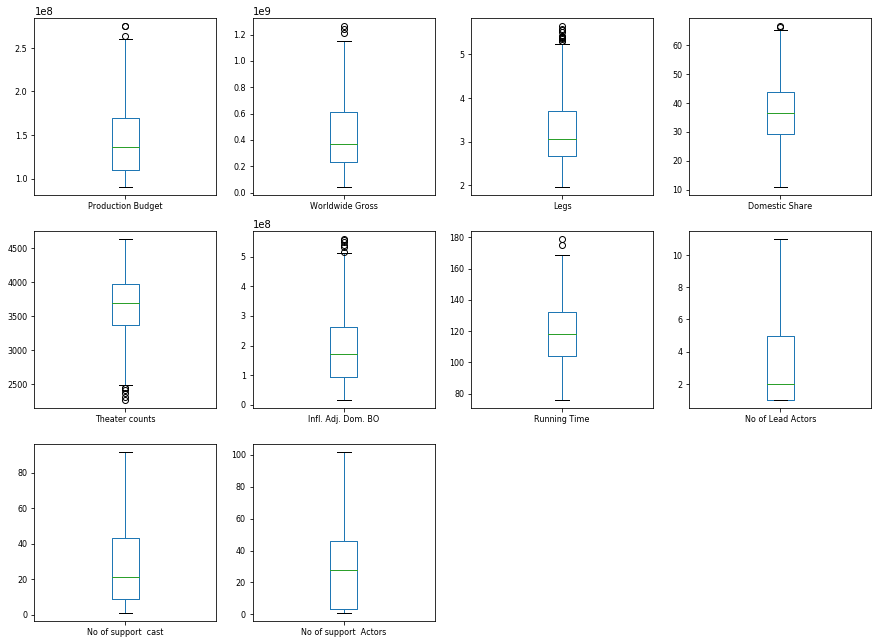

In [144]:
df_out.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,fontsize=8, figsize = (15, 15))
plt.show()

In [145]:
#Using user defined function to calculate VIF Score
import statsmodels.formula.api as smf
def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0, xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=smf.ols(formula='y~x', data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print( " VIF score for", xvar_names[i], "is:" , vif)
vif_cal(df_out.select_dtypes(np.number),'Worldwide Gross')

 VIF score for Production Budget is: 1.47
 VIF score for Legs is: 1.39
 VIF score for Domestic Share is: 1.16
 VIF score for Theater counts is: 1.89
 VIF score for Infl. Adj. Dom. BO is: 1.86
 VIF score for Running Time is: 1.23
 VIF score for No of Lead Actors is: 1.1
 VIF score for No of support  cast is: 1.17
 VIF score for No of support  Actors is: 1.18


In [146]:
df_vf_without_outlier=pd.get_dummies(df_out,drop_first=True)

In [147]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
robust_scaled_df_vf = scaler.fit_transform(df_vf_without_outlier)
robust_scaled_df_vf = pd.DataFrame(robust_scaled_df_vf, columns=df_vf_without_outlier.columns)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CE9998B7F0>,
      dtype=object)

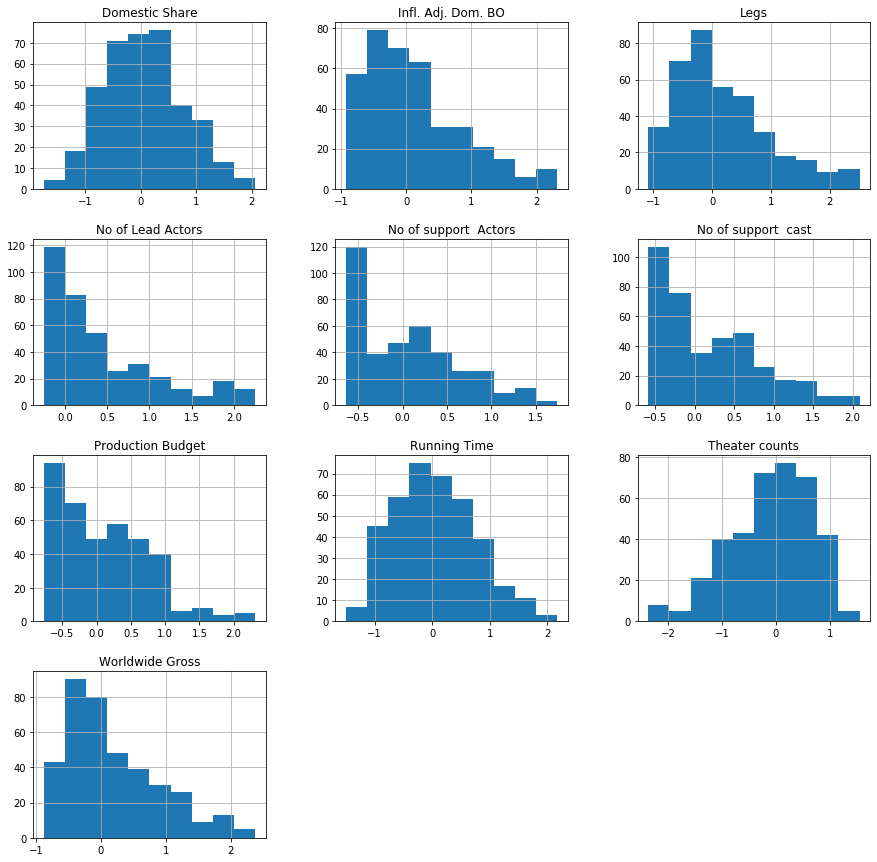

In [148]:
robust_scaled_df_vf.hist(column=['Production Budget', 'Worldwide Gross', 'Legs', 'Domestic Share',
       'Theater counts', 'Infl. Adj. Dom. BO', 'Running Time',
       'No of Lead Actors', 'No of support  cast', 'No of support  Actors'],figsize=(15,15))

In [149]:
X3=robust_scaled_df_vf.drop(["Worldwide Gross"],axis=1)
y3=robust_scaled_df_vf["Worldwide Gross"]

In [150]:
from sklearn.model_selection import train_test_split 
seed = 10
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state = seed)

In [155]:
#Model training
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
model = LinearRegression()
MLR_model_no_outlier = model.fit(X_train3, y_train3)
y_train_pred = MLR_model_no_outlier.predict(X_train3)
y_test_pred = MLR_model_no_outlier.predict(X_test3)
print ("R-squared Training",r2_score(y_train3, y_train_pred))
print ("R-squared Testing",r2_score(y_test3,y_test_pred))
print ("Train RMSE : ",np.sqrt(mean_squared_error(y_train3, y_train_pred)))
print ("Test RMSE : ",np.sqrt(mean_squared_error(y_test3, y_test_pred)))

R-squared Training 1.0
R-squared Testing 0.8865962503492677
Train RMSE :  5.249486481430248e-15
Test RMSE :  0.24886769871148412


In [156]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
kfold1=KFold(n_splits=10)
r1=cross_val_score(MLR_model_no_outlier,X_train3,y_train3,cv=kfold1,scoring='r2')
print("R-squared Training",r1.mean())

R-squared Training 0.8458483554599192


In [157]:
kfold1=KFold(n_splits=10)
result2=cross_val_score(MLR_model_no_outlier,X_test3,y_test3,cv=kfold1,scoring='r2')
print("R-squared Testing",result2.mean())

R-squared Testing 0.9015235740181492


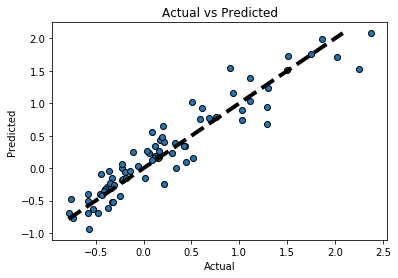

In [158]:
# Diagnosis of Model
# Checking Linearity Assusmption and Constant Variance of Residual Terms
fig, ax = plt.subplots()
ax.scatter(y_test3, y_test_pred, edgecolors=(0, 0, 0))
ax.plot([y_test3.min(), y_test_pred.max()], [y_test3.min(), y_test_pred.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()


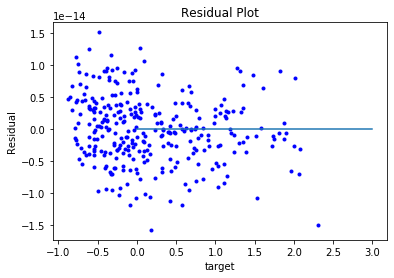

In [159]:
res = y_train3 - y_train_pred
plt.plot(y_train3,res,'b.')
plt.plot([3,0],[0,0])
plt.xlabel("target")
plt.ylabel("Residual")
plt.title("Residual Plot")
plt.show()


0.9968850534593651

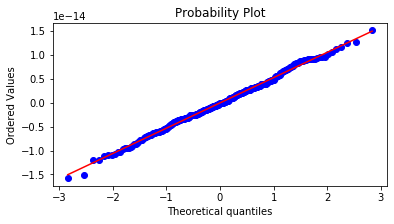

In [160]:
#Checming Normality Condition
import scipy as sp
fig, ax = plt.subplots(figsize=(6,3))
_, (__, ___, r) = sp.stats.probplot(res.ravel(), plot=ax, fit=True)
r**2